In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#loading dataset
df = pd.read_csv("Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory data Analysis

In [9]:
#some general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#descriptive statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#checking null values percentage
df.isna().sum()/len(df)*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [12]:
#checking duplicate values
df.duplicated().sum()

0

C:\Users\Bidisha Shit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

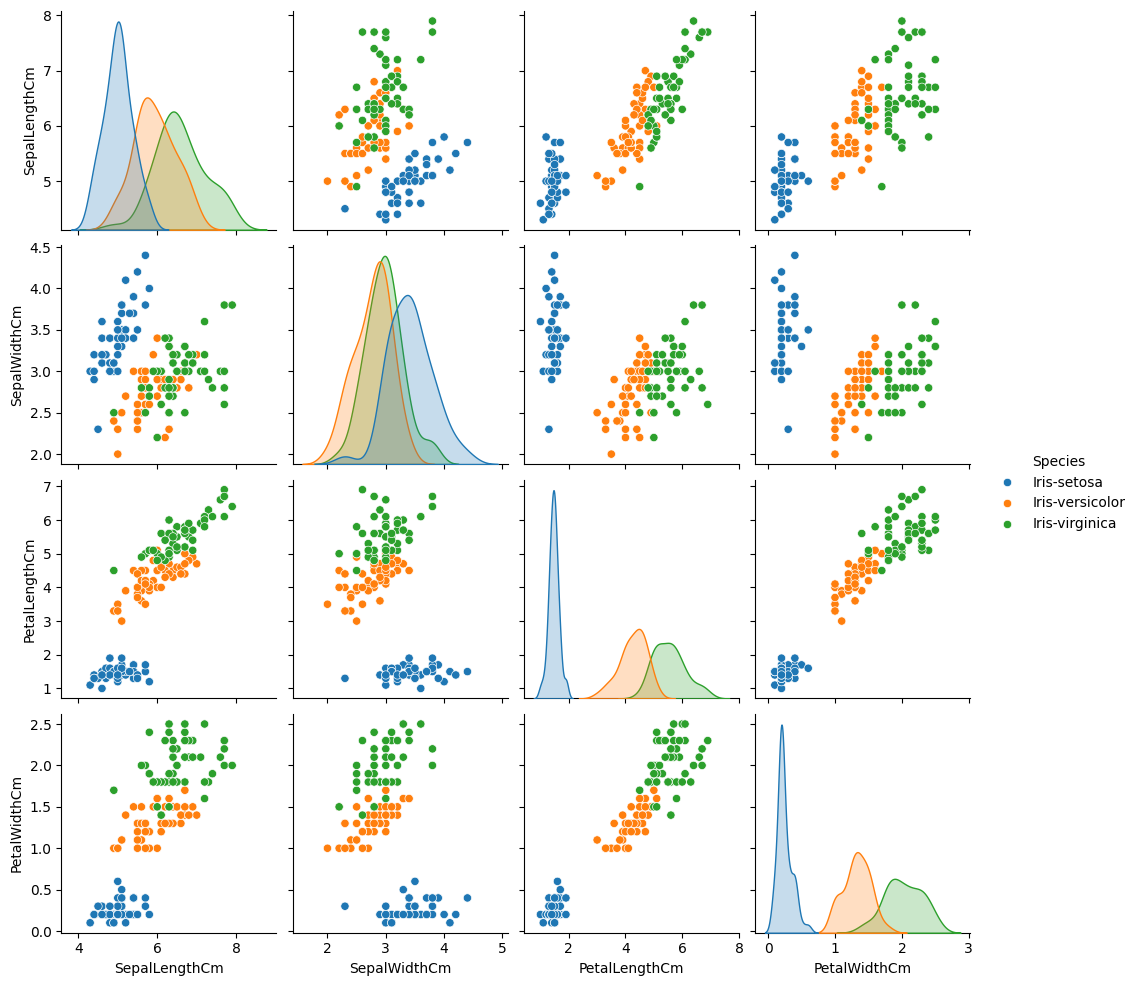

In [13]:
#Pairplot
sns.pairplot(df.drop('Id',axis=1),hue = 'Species')
plt.show

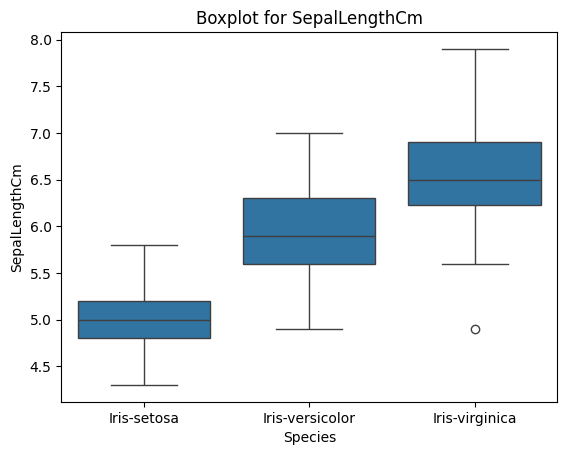

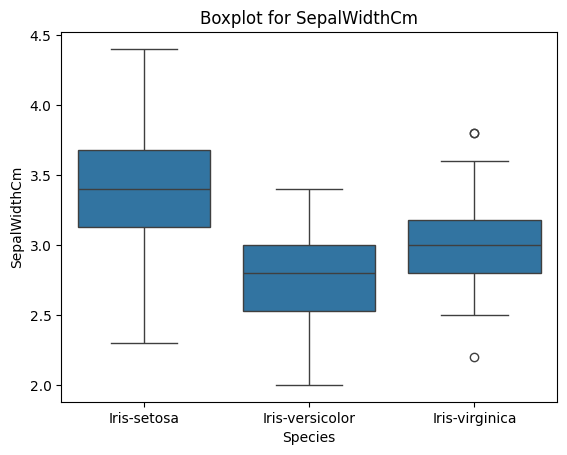

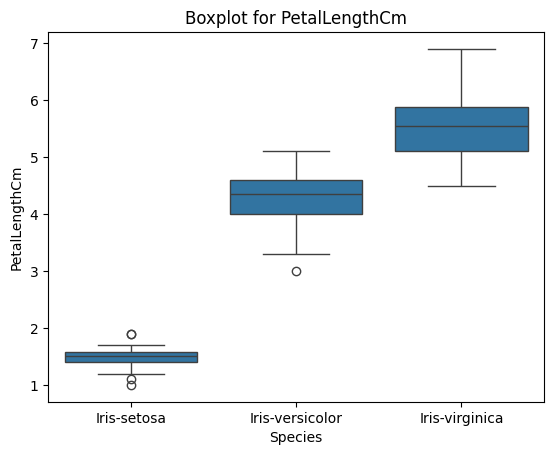

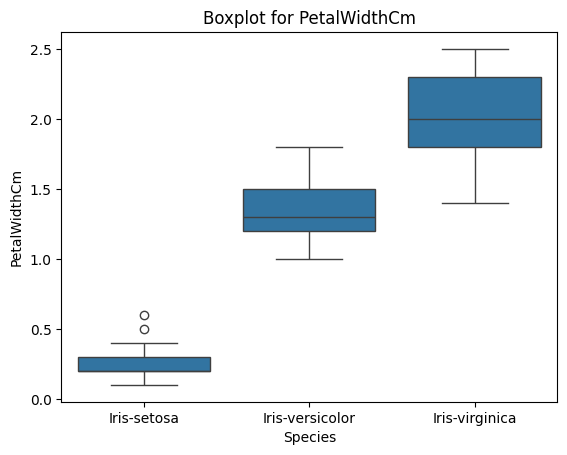

In [14]:
# Box plot
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
    plt.show()

we got some outliers according to above box plot we can detect and remove outliers.

In [15]:
df.shape

(150, 6)

Standard Deviation Method

Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

In [17]:
for column in df.columns[1:-1]:
    for specy in df["Species"].unique():
        Specy_type=df[df["Species"]==specy]
        Selected_column=Specy_type[column]
        
        avg = Selected_column.mean()
        std = Selected_column.std()
        
        upper_lmt = avg + (3 * std) 
        lower_lmt= avg - (3 * std)

        # picking outliers' indeces
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index 

        # dropping outliers
        df.drop(index=outliers, inplace=True) 
        print(column,specy,outliers)

SepalLengthCm Iris-setosa Index([], dtype='int64')
SepalLengthCm Iris-versicolor Index([], dtype='int64')
SepalLengthCm Iris-virginica Index([], dtype='int64')
SepalWidthCm Iris-setosa Index([], dtype='int64')
SepalWidthCm Iris-versicolor Index([], dtype='int64')
SepalWidthCm Iris-virginica Index([], dtype='int64')
PetalLengthCm Iris-setosa Index([], dtype='int64')
PetalLengthCm Iris-versicolor Index([], dtype='int64')
PetalLengthCm Iris-virginica Index([], dtype='int64')
PetalWidthCm Iris-setosa Index([43], dtype='int64')
PetalWidthCm Iris-versicolor Index([], dtype='int64')
PetalWidthCm Iris-virginica Index([], dtype='int64')


Interquartile Range Method  

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals

.
It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lowelimiter or above (Q3 + 1.5x IQR) or boxplot uppelimiter. It can be visually represented by the box plot.

In [19]:
for column in df.columns[1:-1]:
    for specy in df["Species"].unique():
        Specy_type = df[df["Species"] == specy]
        Selected_column = Specy_type[column]
        
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        
        iqr = q3 - q1 # this is interquartile range
        
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        
        # picking outliers' indeces
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index 
        print(outlierss)

        # dropping outliers
        df.drop(index = outlierss, inplace=True) 

Index([], dtype='int64')
Index([], dtype='int64')
Index([106], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([5, 13, 14, 18, 20, 22, 23, 24, 35, 44], dtype='int64')
Index([98], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


Label Encoding

We can see our target column 'Species' is object type column.


Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [20]:
from sklearn.preprocessing import LabelEncoder
labenc= LabelEncoder()
# transforming Species column into label encoding format
df["Species"] = labenc.fit_transform(df["Species"]) 

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Correlation Matrix


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [22]:
# Compute the correlation matrix
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.722785,-0.327916,0.873981,0.890948,0.940103
SepalLengthCm,0.722785,1.000000,-0.077383,0.881360,0.824859,0.794906
SepalWidthCm,-0.327916,-0.077383,1.000000,-0.363951,-0.291013,-0.352365
PetalLengthCm,0.873981,0.881360,-0.363951,1.000000,0.959920,0.946123
PetalWidthCm,0.890948,0.824859,-0.291013,0.959920,1.000000,0.953394
Species,0.940103,0.794906,-0.352365,0.946123,0.953394,1.000000


<Axes: >

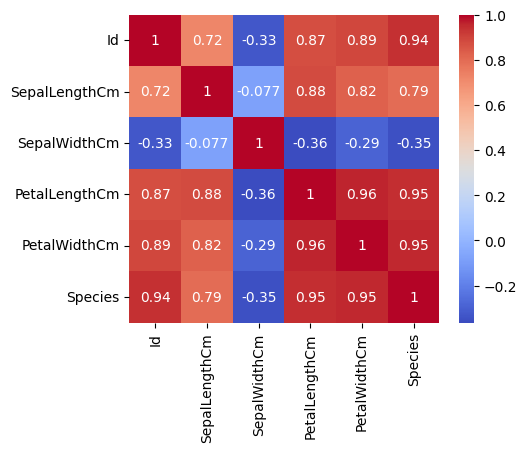

In [23]:
# display the correlation matrix using a heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [24]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [25]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_logreg = model1.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", accuracy_logreg)

Accuracy (Logistic Regression):  92.85714285714286


C:\Users\Bidisha Shit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
accuracy_knn = model2.score(x_test, y_test) * 100
print("Accuracy (KNN): ", accuracy_knn)

Accuracy (KNN):  92.85714285714286


In [27]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
accuracy_decision_tree = model3.score(x_test, y_test) * 100
print("Accuracy (Decision Tree): ", accuracy_decision_tree)

Accuracy (Decision Tree):  96.42857142857143


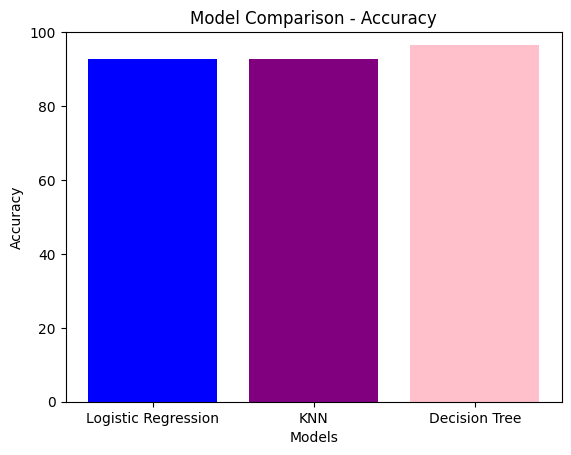

In [28]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logreg, accuracy_knn, accuracy_decision_tree]

plt.bar(models, accuracies, color=['blue', 'purple', 'pink'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()

Decision Tree Classifier gives more accurate model